# Introducción a la Inteligencia Artificial - CEIA Coh17 (UBA)
## Trabajo Final
### Integrantes:

Agustín de la Vega (delavega.agus@gmail.com)

Agustina Quiros (agustinaqr@gmail.com)

Matías Cardozo Pittana (cardozo.matiasp@gmail.com)

Paola Cartalá (paola.cartala@gmail.com)

Florentino Arias (florito.arias@gmail.com)

# TP3: Detector de SPAM

Uno de los problemas más comunes en la clasificación es la detección de correos electrónicos SPAM. Uno de los primeros modelos utilizados para abordar este problema fue el clasificador de Bayes ingenuo. La detección de SPAM es un problema persistente en el mundo digital, ya que los spammers continúan adaptando sus estrategias para eludir los filtros de correo no deseado. Además del clasificador de Bayes ingenuo, se han desarrollado y utilizado una variedad de técnicas más avanzadas en la detección de SPAM, que incluyen algoritmos de aprendizaje automático, redes neuronales y métodos basados en reglas.

En este trabajo práctico, utilizaremos un conjunto de datos que consta de 4601 observaciones de correos electrónicos, de los cuales 2788 son correos legítimos y 1813 son correos SPAM. Dado que el contenido de los correos electrónicos es un tipo de dato no estructurado, es necesario procesarlo de alguna manera. Para este conjunto de datos, ya se ha aplicado un procesamiento típico en el Procesamiento del Lenguaje Natural (NLP), que consiste en contar la frecuencia de palabras observadas en los correos.

El procesamiento de lenguaje natural (NLP) desempeña un papel fundamental en la detección de SPAM, ya que permite analizar el contenido de los correos electrónicos y extraer características relevantes para la clasificación. Además de contar la frecuencia de palabras, se pueden utilizar técnicas más sofisticadas, como la extracción de características semánticas y el análisis de sentimientos, para mejorar la precisión de los modelos de detección de SPAM.

En este proceso, se cuenta la cantidad de ocurrencias de cada palabra en los diferentes correos.

Con el fin de preservar la privacidad de los mensajes, la frecuencia de palabras se encuentra normalizada. El conjunto de datos está compuesto por 54 columnas de atributos que se denominan:

- `word_freq_XXXX`: Donde `XXXX` es la palabra o símbolo. Los valores son enteros que van de 0 a 20k.

Además, hay una columna adicional llamada `spam`, que es 1 si el correo es SPAM o 0 si no lo es.

Los clasificadores de Bayes ingenuos fueron los primeros filtros utilizados por las aplicaciones de correo electrónico, basados en este principio de palabras. La idea es que, partiendo de un dato a priori sobre la probabilidad de que un correo sea SPAM o no, ciertas palabras nos indicarán que la probabilidad a posteriori, dadas esas palabras, es más probable que el correo sea SPAM o no.

Dataset disponible en: https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/intro_ia/tree/main/clase6/trabajo_practico_3/dataset

# Ejercicio 1
Análisis Exploratorio de Datos (EDA)

Identificación de las 10 palabras más comunes en correos SPAM y No SPAM.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Aquí lo linkeé a mi Drive, ver si de esta manera le anda al resto....
file_path = '/content/drive/My Drive/Colab Notebooks/spambase.csv'

# Cargar el dataset desde el archivo CSV
dataset = pd.read_csv(file_path)

# Filtrar los datos de SPAM y No SPAM
spam_data = dataset[dataset['spam'] == 1]
non_spam_data = dataset[dataset['spam'] == 0]

# Eliminar la columna 'spam' para el análisis de palabras
spam_words = spam_data.drop(columns=['spam']).sum().sort_values(ascending=False)
non_spam_words = non_spam_data.drop(columns=['spam']).sum().sort_values(ascending=False)

# Obtener las 10 palabras más comunes
top_spam_words = spam_words.head(10)
top_non_spam_words = non_spam_words.head(10)

# Mostrar los resultados
print("Top 10 palabras más comunes en correos SPAM:")
print(top_spam_words)
print("\nTop 10 palabras más comunes en correos No SPAM:")
print(top_non_spam_words)

# Identificar palabras en común
common_words = set(top_spam_words.index).intersection(set(top_non_spam_words.index))
print("\nPalabras en común entre SPAM y No SPAM:")
print(common_words)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Top 10 palabras más comunes en correos SPAM:
word_freq_you         4105599
word_freq_your        2502597
word_freq_will         997100
word_freq_free         939790
word_freq_our          931799
char_freq_!            931352
word_freq_all          732080
word_freq_mail         635470
word_freq_email        578759
word_freq_business     521250
dtype: int64

Top 10 palabras más comunes en correos No SPAM:
word_freq_you        3541702
word_freq_george     3527559
word_freq_hp         2496576
word_freq_will       1495268
word_freq_your       1223098
word_freq_hpl        1204398
word_freq_re         1159138
word_freq_edu         800669
word_freq_address     681569
word_freq_meeting     604460
dtype: int64

Palabras en común entre SPAM y No SPAM:
{'word_freq_you', 'word_freq_your', 'word_freq_will'}


# Ejercicio 2
División del Conjunto de Datos (70% train y 30% test).

In [ ]:
from sklearn.model_selection import train_test_split

# Separar las características y la etiqueta (spam)
X = dataset.drop(columns=['spam'])
y = dataset['spam']

# Separar en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mostrar el tamaño de cada conjunto
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} correos")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} correos")

Tamaño del conjunto de entrenamiento: 3220 correos
Tamaño del conjunto de prueba: 1381 correos


# Ejercicio 3
Entrenar un clasificador de Bayes ingenuo utilizando el conjunto de entrenamiento.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

nb_classifier = MultinomialNB()

nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8725561187545257
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       804
           1       0.78      0.96      0.86       577

    accuracy                           0.87      1381
   macro avg       0.88      0.89      0.87      1381
weighted avg       0.89      0.87      0.87      1381



# Ejercicio 4
Entrenar un clasificador de Regresión Logística, asegurándote de normalizar los datos antes de entrenar.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_classifier = LogisticRegression(random_state=1234, max_iter=1000)

logistic_classifier.fit(X_train_scaled, y_train)

y_pred_logistic = logistic_classifier.predict(X_test_scaled)

print(accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))

0.9217958001448225
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       804
           1       0.94      0.87      0.90       577

    accuracy                           0.92      1381
   macro avg       0.92      0.91      0.92      1381
weighted avg       0.92      0.92      0.92      1381



# Ejercicio 5
Evaluación de Modelos:

Calcular la matriz de confusión para ambos modelos en el conjunto de prueba.
Analizar los tipos de errores cometidos por cada modelo (falsos positivos y falsos negativos).
Reflexionar sobre cuál de estos errores es más crítico en el contexto del problema de detección de SPAM.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

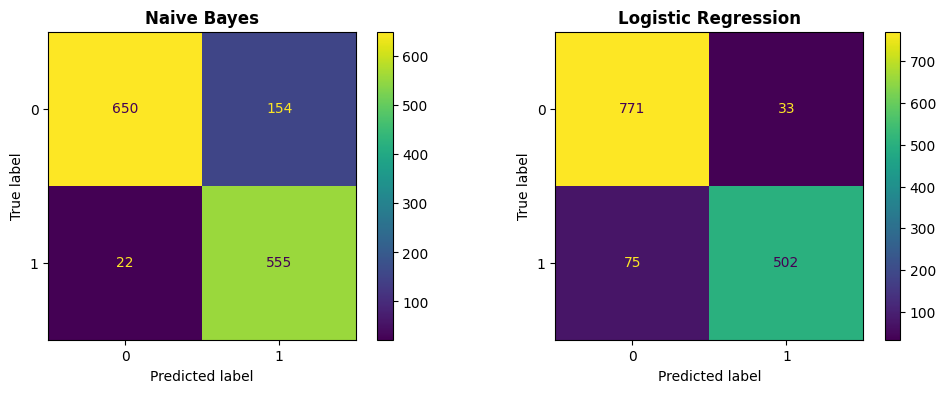

In [ ]:
cm1 = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred_logistic)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# NB
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(ax=ax[0])
ax[0].set_title('Naive Bayes', fontweight='bold')

# LR
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(ax=ax[1])
ax[1].set_title('Logistic Regression', fontweight='bold')

plt.show()

***Naive Bayes***

- True Positives (TP): 650.
- True Negatives (TN): 555.  
- False Positives (FP): 154.
- False Negatives (FN): 22.

***Logistic Regression***

- True Positives (TP): 771.
- True Negatives (TN): 502.  
- False Positives (FP): 33.
- False Negatives (FN): 75.

> En principio, observando los números de la matriz de confusión para ambos modelos vemos que, los clasificadores tienen mas aciertos que errores.


En el contexto de clasificación de SPAM, consideramos que el error más critico son los **Falsos Positivos** (`Error de Tipo I`) que sucede cuando el modelo predijo *positivo* pero la etiqueta verdadera era *negativo*. Para el clasificador Naive Bayes tenemos un total de 154 (FP) y para el clasificador  Regresión Logística un total de 33 (FP), teniendo en cuenta este tipo de error, vemos una mejora significativa en el segundo clasificador probado. El impacto de perder un correo importante es mas grave que recibir un correo spam en la bandeja de entrada que simplemente se podría ignorar.

Con esto podemos enfocarnos en la métrica de **precisión** que se refiere a la proporción de casos positivos identificados correctamente por el
clasificador con respecto a todos los casos que el clasificador etiquetó como positivos. Queremos que nuestro clasificador cuando diga que es SPAM, realmente este seguro, ya que no queremos que el usuario pierda correos electrónicos importantes.


# Ejercicio 6
Métricas de Rendimiento:

Calcular la precisión y recuperación para ambos modelos.
Comparar cuál modelo tiene mejor rendimiento en base a estas métricas y cómo se relacionan con los tipos de errores.

In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calcular Precision y Recall para Naive Bayes
precision_nb = precision_score(y_test, y_pred)
recall_nb = recall_score(y_test, y_pred)

# Calcular Precision y Recall para Regresión Logística
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)

# Resultados
print(f"Precision Naive Bayes: {precision_nb:.2f}")
print(f"Recall Naive Bayes: {recall_nb:.2f}")

print(f"Precision Logistic Regression: {precision_logistic:.2f}")
print(f"Recall Logistic Regression: {recall_logistic:.2f}")

Precision Naive Bayes: 0.78
Recall Naive Bayes: 0.96
Precision Logistic Regression: 0.94
Recall Logistic Regression: 0.87


**Análisis de las métricas**:

- **Precisión**: Regresión Logística (0.94)

La precisión mide la proporción de verdaderos positivos (TP) sobre todos los casos etiquetados como positivos por el modelo (TP + FP). En otras palabras, nos dice qué tan seguro está el modelo cuando predice que un correo es SPAM. Dado que un falso positivo (FP) en el contexto de detección de SPAM es más crítico (pérdida de un correo legítimo), una mayor precisión es preferible. La Regresión Logística tiene una mayor precisión, lo que indica que es menos probable que clasifique erróneamente un correo legítimo como SPAM en comparación con Naive Bayes.
- **Recall**: Naive Bayes (0.96)

El recall mide la proporción de verdaderos positivos sobre todos los casos que realmente son positivos (TP + FN). Es decir, mide la capacidad del modelo para identificar todos los correos que realmente son SPAM. Un alto recall significa que el modelo está capturando la mayoría de los correos SPAM, aunque eso podría ser a costa de un mayor número de falsos positivos. En este caso, Naive Bayes tiene un recall más alto, lo que sugiere que es mejor capturando los correos SPAM, pero con un mayor riesgo de etiquetar correos legítimos como SPAM.

**Relación con los errores analizados (FP y FN)**:
- `Error de Tipo I (Falsos Positivos, FP)`: Como se discutió en el ejercicio anterior, en un sistema de detección de SPAM, un FP (etiquetar un correo legítimo como SPAM) es un error más costoso que un FN (dejar un SPAM en la bandeja de entrada). La **Regresión Logística**, con su mayor precisión, minimiza este tipo de error, lo cual es deseable en este contexto.

En conclusión, dado que en la detección de SPAM **es más importante evitar los falsos positivos**, la **Regresión Logística** es el mejor modelo en este contexto debido a su mayor precisión, aunque tiene un recall ligeramente menor. Esto significa que, en general, es más confiable para asegurarse de que los correos importantes no se pierdan en la carpeta de SPAM.

# Ejercicio 7
Curva ROC y AUC:

Generar la curva ROC y calcular el AUC para ambos modelos.
Comparar el rendimiento de los modelos según estas métricas.

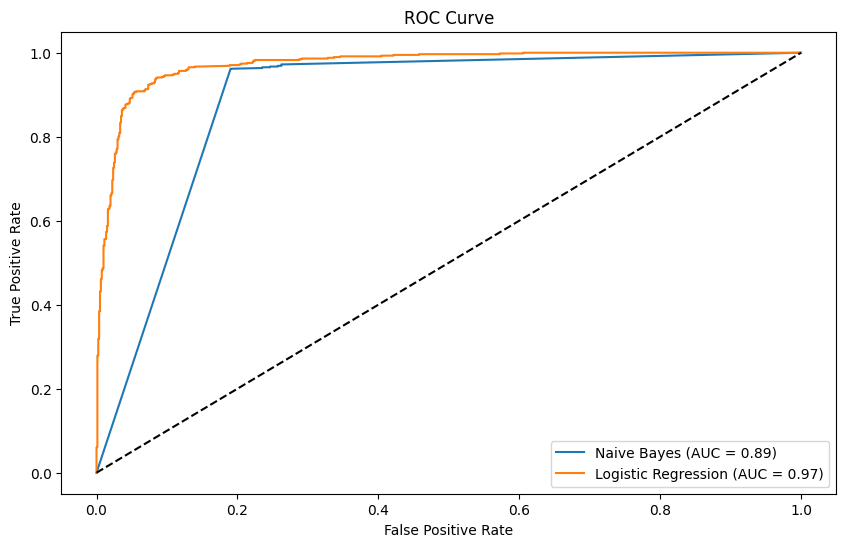

In [ ]:
# Generar probabilidades de predicción para el modelo Naive Bayes
y_pred_proba_nb = nb_classifier.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
auc_nb = roc_auc_score(y_test, y_pred_proba_nb)

# Generar probabilidades de predicción para el modelo de Regresión Logística
y_pred_proba_logistic = logistic_classifier.predict_proba(X_test_scaled)[:, 1]
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_proba_logistic)
auc_logistic = roc_auc_score(y_test, y_pred_proba_logistic)

# Plotear las curvas ROC con los datos reales
plt.figure(figsize=(10, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {auc_logistic:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal de referencia
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


AUC para ambos modelos:

*   Naive Bayes: AUC ≈ 0.89
*   Regresión Logística: AUC ≈ 0.97

Estos resultados indican que el modelo de Regresión Logística tiene un rendimiento significativamente mejor que el modelo de Naive Bayes en este conjunto de datos, como lo demuestra el mayor valor del AUC (área bajo la curva).